In [2]:
import os

In [3]:
os.getcwd()

'C:\\Users\\rguerrerop\\Documents\\google apps analysis'

In [14]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
sns.set(rc={'figure.figsize':(25,15)})

import plotly
# connected=True means it will download the latest version of plotly javascript library.
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import plotly.figure_factory as ff
import cufflinks as cf


import warnings
warnings.filterwarnings('ignore')

In [55]:
df = pd.read_csv("googleplaystore.csv")

In [73]:
#df[ (df['Price']>0) & (df['Type'] == 'Paid')]
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Eliminar los datos que puedan estar duplicados

In [57]:
df.drop_duplicates(subset='App', inplace=True)
df = df[df['Android Ver'] != np.nan]
df = df[df['Android Ver'] != 'NaN']
df = df[df['Installs'] != 'Free']
df = df[df['Installs'] != 'Paid']

Contar la cantidad de aplicaciones

In [58]:
print("Cantidad de aplicaciones ", len(df))

Cantidad de aplicaciones  9659


Realizar una limpieza de datos
Quitar el signo de '+', ',' y convertir a números la columna de Installs

In [74]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)

In [75]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else (x))

In [76]:
df['Installs'] = df['Installs'].apply(lambda x: float(x))

In [77]:
df['Installs'] = df['Installs'].apply(lambda x: int(x))

In [78]:
df['Size'] = df['Size'].apply(lambda x: x.replace('M','') if 'M' in str(x) else x)

In [79]:
df['Size'] = df['Size'].apply(lambda x: float(x.replace('K', '')/1000) if 'K' in str(x) else x)

In [80]:
df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else x)

In [81]:
df['Price'] = df['Price'].apply(lambda x: float(x))

In [82]:
df['Reviews'] = df['Reviews'].apply(lambda x: int(x))

In [84]:
df[(df['Price']>0) & (df['Reviews']> 0)].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8,100000,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39,100000,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,100000,Paid,3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up
476,"Moco+ - Chat, Meet People",DATING,4.2,1545,Varies with device,10000,Paid,3.99,Mature 17+,Dating,"June 19, 2018",2.6.139,4.1 and up
477,Calculator,DATING,2.6,57,6.2,1000,Paid,6.99,Everyone,Dating,"October 25, 2017",1.1.6,4.0 and up


Sumarizar las características principales de la base para encontrar explicaciones

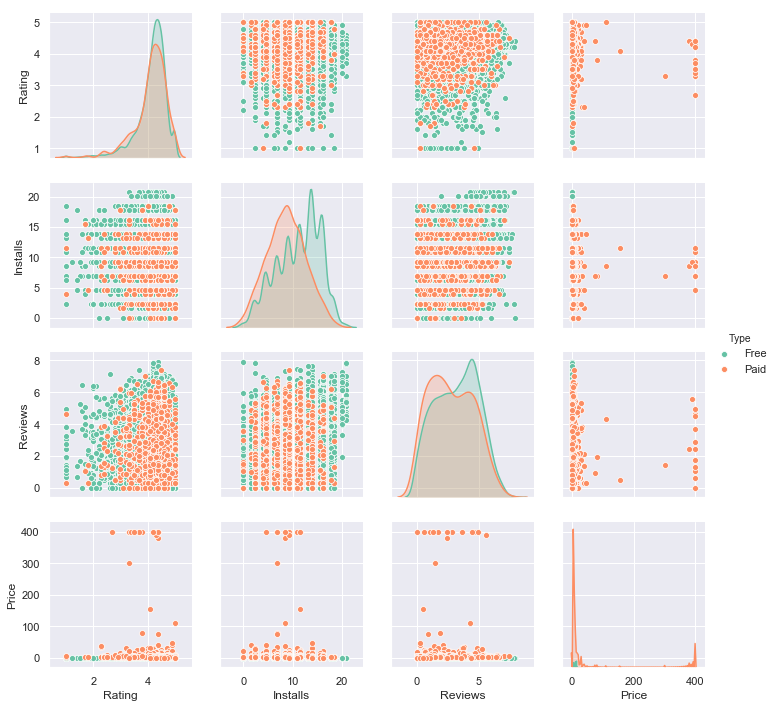

In [90]:
x = df['Rating'].dropna()
y = df['Size'].dropna()
z = df['Installs'][df.Installs!=0].dropna()
p = df['Reviews'][df.Reviews!=0].dropna()
t = df['Type'].dropna()
price = df['Price']

p = sns.pairplot(pd.DataFrame(list(zip(x, y, np.log(z), np.log10(p), t, price)), 
                             columns=['Rating', 'Size', 'Installs', 'Reviews', 'Type', 'Price']), hue='Type', palette="Set2")


In [109]:
numero_de_apps_por_categoria = df['Category'].value_counts().sort_values(ascending=False)

data = [go.Pie(
        labels = numero_de_apps_por_categoria.index,
        values = numero_de_apps_por_categoria.values,
        hoverinfo = 'label+value')]
plotly.offline.iplot(data, filename='active_category')

In [105]:
numero_de_apps_por_categoria.head()

FAMILY      1832
GAME         959
TOOLS        827
BUSINESS     420
MEDICAL      395
Name: Category, dtype: int64

Promedio de apps por Rating

In [106]:
data = [go.Histogram(
        x = df.Rating,
        xbins = {'start': 1, 'size': 0.1, 'end' :5})]

In [108]:
print('Poromedio de rating por applicación = ', np.mean(df['Rating']))
plotly.offline.iplot(data, filename='Promedio_rating')

Poromedio de rating por applicación =  4.173243045387998


Generalmente, la mayoría de las aplicaciones tienen un rate de 4.17

Explorar correlaciones

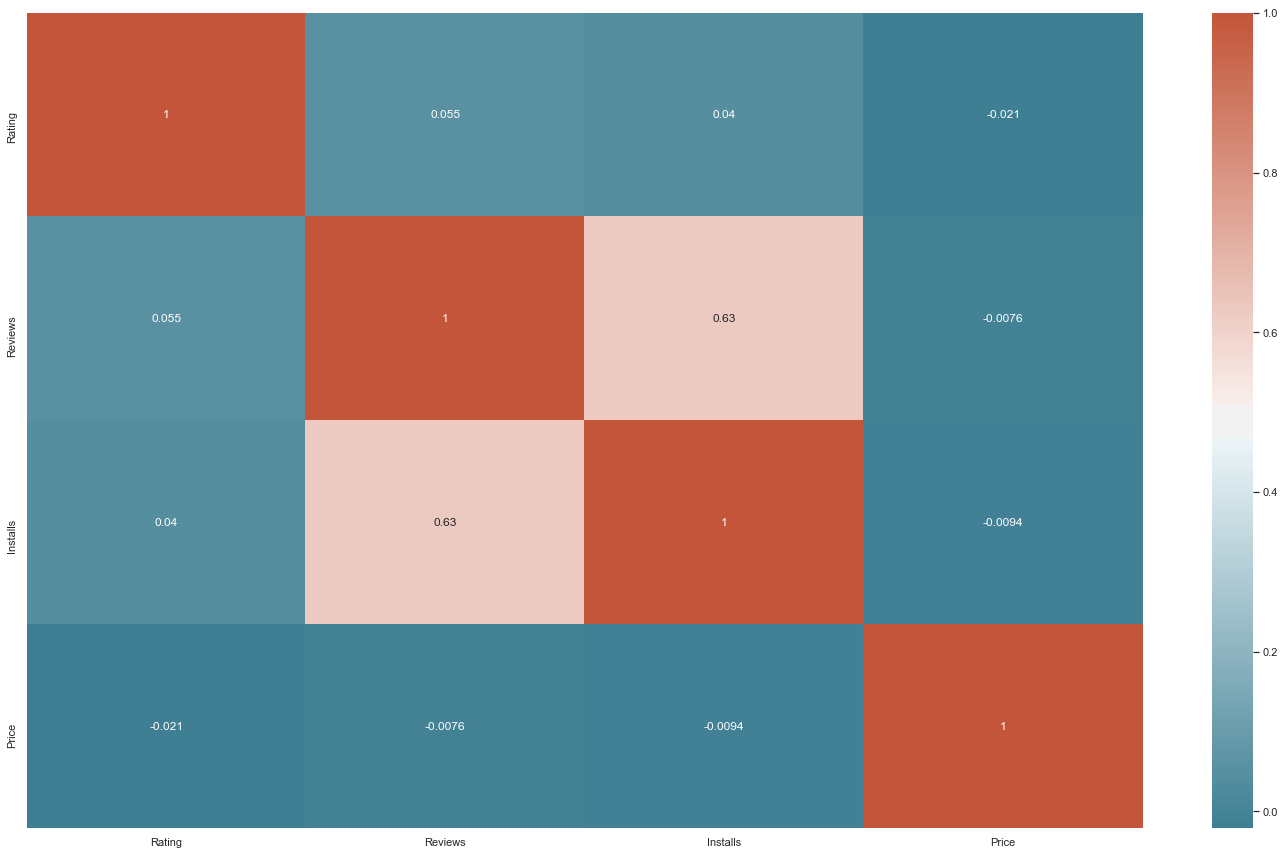

In [115]:
corrmat = df.corr()
p = sns.heatmap(corrmat, annot=True, cmap=sns.diverging_palette(220,20, as_cmap=True))

Analisis de sentimientos - Reviews del usuario

In [116]:
os.listdir()

['.ipynb_checkpoints',
 'Archivo.R',
 'GoogleAnalysisPython.ipynb',
 'googleplaystore.csv',
 'googleplaystore_user_reviews.csv']

In [117]:
reviews_df = pd.read_csv('googleplaystore_user_reviews.csv')

In [118]:
reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [121]:
merged_df = pd.merge(df, reviews_df, on ='App', how = "inner")
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])

In [125]:
grouped_sentiment_category_count = merged_df.groupby(['Category', 'Sentiment']).agg({'App': 'count'}).reset_index()
grouped_sentiment_category_sum = merged_df.groupby(['Category']).agg({'Sentiment': 'count'}).reset_index()

new_df = pd.merge(grouped_sentiment_category_count, grouped_sentiment_category_sum, on=["Category"])

new_df['Sentiment_Normalized'] = new_df.App/new_df.Sentiment_y
new_df = new_df.groupby('Category').filter(lambda x: len(x) ==3)

trace1 = go.Bar(
    x=list(new_df.Category[::3])[6:-5],
    y=new_df.Sentiment_Normalized[::3][6:-5],
    name='Negativo',
    marker=dict(color = 'rgb(209,49,20)')
)

trace2 = go.Bar(
    x=list(new_df.Category[::3])[6:-5],
    y= new_df.Sentiment_Normalized[1::3][6:-5],
    name='Neutral',
    marker=dict(color = 'rgb(49,130,189)')
)

trace3 = go.Bar(
    x=list(new_df.Category[::3])[6:-5],
    y= new_df.Sentiment_Normalized[2::3][6:-5],
    name='Positive',
    marker=dict(color = 'rgb(49,189,120)')
)

data = [trace1, trace2, trace3]

layout = go.Layout(
    title = 'Sentiment Analysis',
    barmode='stack',
    xaxis = {'tickangle': -45},
    yaxis = {'title': 'Fraction of reviews'})

fig = go.Figure(data=data, layout=layout)

plotly.offline.iplot({'data': data, 'layout': layout})
                
    